# Kolmogorov Smirnov Test

En este cuaderno exploramos la detección de *data drift* con la prueba **Kolmogorov–Smirnov (KS)** para dos muestras. El objetivo es comprobar si dos conjuntos de datos podrían provenir de la misma distribución y, en caso contrario, cuantificar la evidencia del cambio. KS compara las funciones de distribución empíricas (ECDF) de ambas muestras y toma como magnitud la mayor separación entre ellas (estadístico **D**). A partir de **D** y los tamaños muestrales obtenemos un **p-valor** que indica la probabilidad de observar una separación igual o mayor asumiendo que no hay cambio. Fijamos un nivel de significación (por defecto **0.05**) para decidir si el drift es significativo. El cuaderno incluye tres ejemplos con datos sintéticos: (i) distribuciones muy similares, (ii) claramente diferentes y (iii) diferencias sutiles, además de visualizaciones básicas (histogramas) para facilitar la interpretación. *Nota:* KS clásico es unidimensional y asume variables continuas; para datos multivariantes habría que proyectar a 1D, optar por métodos específicos o realizar ciertas modificaciones.


In [ ]:
# Para este notebook hay que tener instalado numpy, scikit-learn, matplotlib y frouros

import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt

from frouros.detectors.data_drift import KSTest

In [4]:
# El data drift busca determinar si dos conjuntos de datos pertenecen a una misma distribución. Es decir, si son similares.
# Esto requiere no solo medir la diferencia entre los dos conjuntos de datos, sino saber si la diferencia es significativa
# y no un fruto del azar.
#
# En este caso usaremos la prueba de Kolmogorov–Smirnov (KS) para dos muestras. KS compara las funciones de distribución
# empíricas de ambos conjuntos y toma como magnitud la mayor diferencia absoluta entre ellas. A esta magnitud se le llama D.
#
# Para saber si la diferencia es significativa no necesitamos teses de permutación: KS proporciona un p-valor analítico
# (o con aproximaciones estándar) a partir de D y de los tamaños de muestra. Este p-valor nos dice la probabilidad de
# observar una D al menos tan grande si ambos conjuntos provinieran de la misma distribución.
#
# Interpretación:
# - Cuanto mayor es D, mayor evidencia de cambio entre distribuciones.
# - Cuanto menor es el p-valor, más significativo es el drift (menos probable que sea fruto del azar).
#
# Por eso, antes de empezar los experimentos hay que definir un umbral (nivel de significación) para el p-valor.
# Lo más estándar en la literatura es usar 0.05.

TRESHOLD= 0.05

In [25]:
# Como vamos a ver la detección de data drift con varios conjuntos de datos lo hemos instanciado como un metodo.
# Recibirá un sample_a como conjunto de datos de referencia y un sample_b como el de test.

def ks_drift_computation(sample_a, sample_b):
    # Instanciamos el detector de drift KS
    detector= KSTest()

    # Lo ajustamos con los datos de la muestra de referencia
    detector.fit(sample_a)

    # Medimos la diferencia con los datos de test
    result= detector.compare(X=sample_b)[0]
    
    # Devolvemos los datos
    return result.statistic, result.p_value

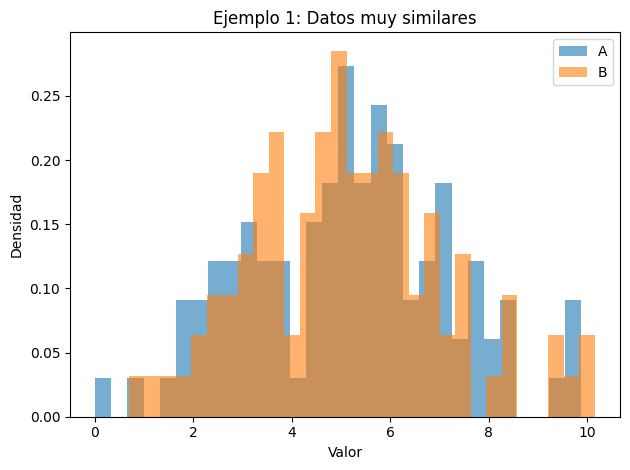

Magnitud del drift: 0.09 
p_value: 0.8154147124661313 
Es significativo? False


In [30]:
# Ejemplo 1: Datos muy similares

# Instanciamos dos Conjuntos de datos diferentes que vamos a visualizar
A= np.random.normal(loc=5, scale=2, size=100)
B= np.random.normal(loc=5, scale=2, size=100)

plt.figure()
bins = 30
plt.hist(A, bins=bins, density=True, alpha=0.6, label="A")
plt.hist(B, bins=bins, density=True, alpha=0.6, label="B")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Ejemplo 1: Datos muy similares")
plt.legend()
plt.tight_layout()
plt.show()

# Y ahora calculamos el data drift entre ambos conjuntos
drift= ks_drift_computation(A, B)

# Como son datos muy parecidos, la magnitud del drift que nos esperamos es baja.
# Además esperamos que el drift no sea significativo.

print(f"Magnitud del drift: {drift[0]} \np_value: {drift[1]} \nEs significativo? {drift[1] <= TRESHOLD}")

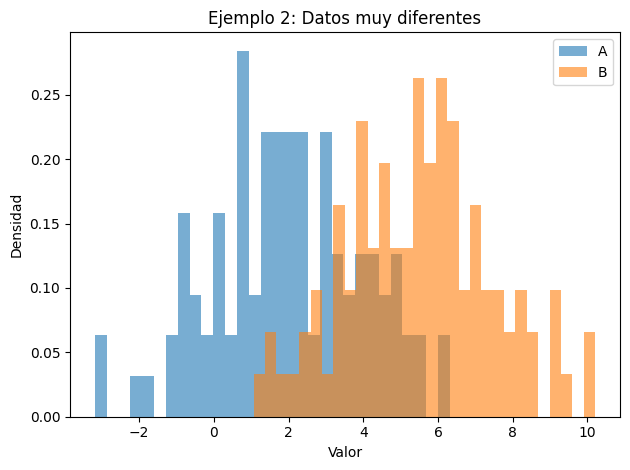

Magnitud del drift: 0.63 
p_value: 6.314161651442317e-19 
Es significativo? True


In [ ]:
# Ejemplo 2: Datos muy diferentes

# Instanciamos dos Conjuntos de datos diferentes que vamos a visualizar
A= np.random.normal(loc=2, scale=2, size=100)
B= np.random.normal(loc=5, scale=2, size=100)

plt.figure()
bins = 30
plt.hist(A, bins=bins, density=True, alpha=0.6, label="A")
plt.hist(B, bins=bins, density=True, alpha=0.6, label="B")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Ejemplo 2: Datos muy diferentes")
plt.legend()
plt.tight_layout()
plt.show()

# Y ahora calculamos el data drift entre ambos conjuntos
drift= ks_drift_computation(A, B)

# Como son datos muy diferentes, la magnitud del drift que nos esperamos es alta.
# Además esperamos que el drift sea significativo.

print(f"Magnitud del drift: {drift[0]} \np_value: {drift[1]} \nEs significativo? {drift[1] <= TRESHOLD}")

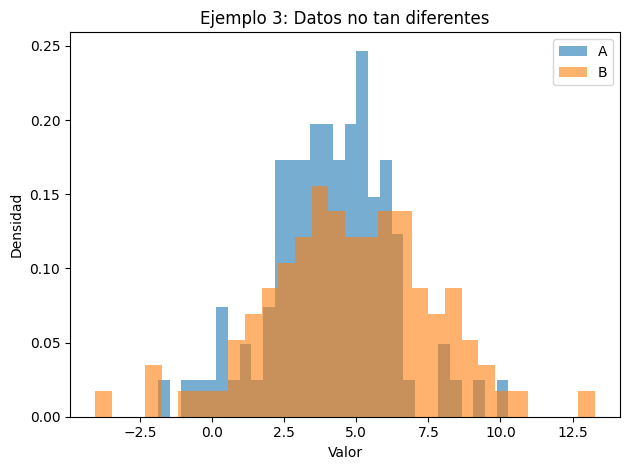

Magnitud del drift: 0.23 
p_value: 0.009878183186176536 
Es significativo? True


In [34]:
# Ejemplo 3: Datos no tan diferentes

# Instanciamos dos Conjuntos de datos diferentes que vamos a visualizar
A= np.random.normal(loc=4, scale=2, size=100)
B= np.random.normal(loc=5, scale=3, size=100)

plt.figure()
bins = 30
plt.hist(A, bins=bins, density=True, alpha=0.6, label="A")
plt.hist(B, bins=bins, density=True, alpha=0.6, label="B")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.title("Ejemplo 3: Datos no tan diferentes")
plt.legend()
plt.tight_layout()
plt.show()

# Y ahora calculamos el data drift entre ambos conjuntos
drift= ks_drift_computation(A, B)

# Lo detectará?

print(f"Magnitud del drift: {drift[0]} \np_value: {drift[1]} \nEs significativo? {drift[1] <= TRESHOLD}")